PUI2015 - Homework #4 Part 2 - Maria Filippelli

In [78]:
import pylab as pl
%pylab inline
import pandas as pd
import numpy as np
import os
import json
import scipy.stats
myseed = np.random.seed(2015)

Populating the interactive namespace from numpy and matplotlib


In [75]:
#generate the distributions
dist_n = np.random.randn(1000)
dist_b = np.random.binomial(1, .5, 1000)

#test AD and KS
print "normal on normal", scipy.stats.kstest(dist_n, 'norm') # do not reject null
print "normal on normal", scipy.stats.anderson(dist_n, dist='norm') # 
print "normal on normal", scipy.stats.chisquare(dist_n)

print "poisson on normal", scipy.stats.kstest(dist_b, 'norm')
print "poisson on normal", scipy.stats.anderson(dist_b, dist='norm')
print "poisson on normal", scipy.stats.chisquare(dist_b)

threshold = scipy.stats.anderson(dist_n, dist='norm')[1][scipy.stats.anderson(dist_n, dist='norm')[2]==[1.0]]
print threshold

normal on normal (0.033276468092624523, 0.21358045237270695)
normal on normal (0.3963980213953846, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
normal on normal (18203.736078206639, 0.0)
poisson on normal (0.5, 0.0)
poisson on normal (179.86031644095419, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
poisson on normal (520.0, 1.0)
[ 1.088]


With alpha=.05, we do not reject the null hypothesis that the distributions are related - this is true for KS and Anderson tests; for chi-square we reject the null hypothesis the the distributions are related

The KS test shows the "poisson on normal" distribution is related so do not reject null hypothesis; the Anderson and chi-square tests show rejection of the null hypothesis

In [88]:
#bincenters
bincenters_n = mybins_n[:-1]+.5*(mybins_n[1]-mybins_n[0])
bincenters_b = mybins_b[:-1]+.5*(mybins_b[1] - mybins_b[0])

print "normal on normal", scipy.stats.entropy(distpdf_n, scipy.stats.norm.pdf(bincenters_n))
print "poisson on normal", scipy.stats.entropy(distpdf_b, scipy.stats.norm.pdf(bincenters_b))

# reject the null that the distributions are the same

normal on normal 0.00480162817937
poisson on normal 1.68378761755


BINOMIAL

In [62]:
#generate empty arrays for sample sizes, n
narray = range(1,50,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))

def mynorm (x, mu, var):
    return scipy.stats.norm.cdf(x, loc=mu, scale=var)

#generate loop for distribution, keep all arguements with loop index in same cell
p=0.5
for i,n in enumerate(narray):
    p=0.5 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = np.random.binomial(n, p, 1000)
    #run the tests.   
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n*p, n*p*(1.0-p)))[0]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]

    #simulating normal distribution for KL and Pearson's chi2
    mybins=np.linspace(min(dist), max(dist), 10)
    bincenters=mybins[:-1]+.5*(mybins[1]-mybins[0])
    kl_b[i] = scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters)+n)
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))

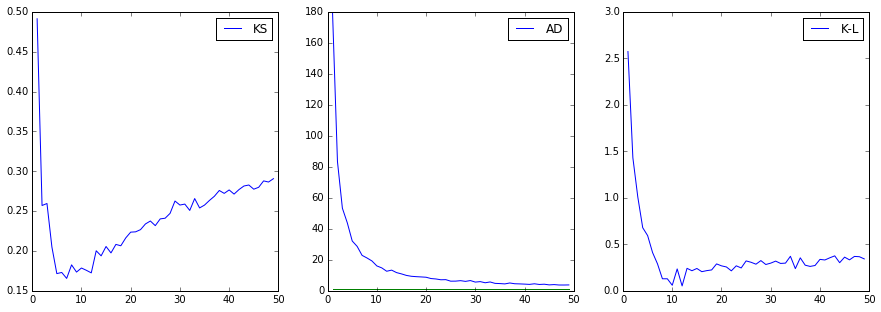

In [63]:
#plot results
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L ')

pl.legend()

The KS, Anderson, and K-L tests show that the distributions of our random sample are somewhat similar with high probablities of smaller numbers and low probabilites of numbers closer to 50.

POISSON

In [89]:
#generate arrays 
narray = range(1,50,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))

for i,n in enumerate(narray):
    p=0.1 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = np.random.poisson(n, 1000)
    #run the tests. 
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n, n))[0]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    
        
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
 
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))


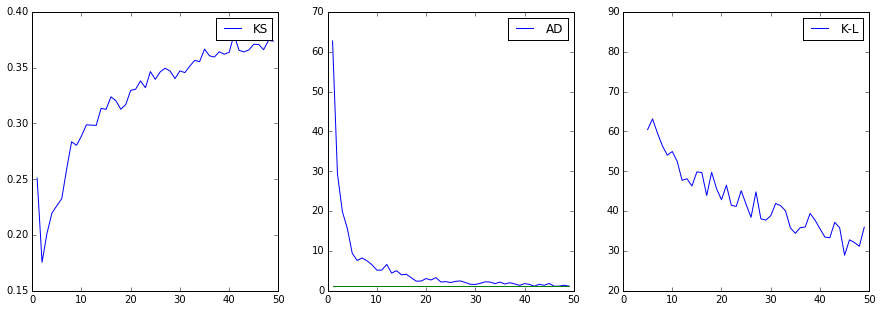

In [65]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L ')

pl.legend()

Using a Poisson distribution, it can be seen that there is a relationship between frequencies of age

Chi-Squared

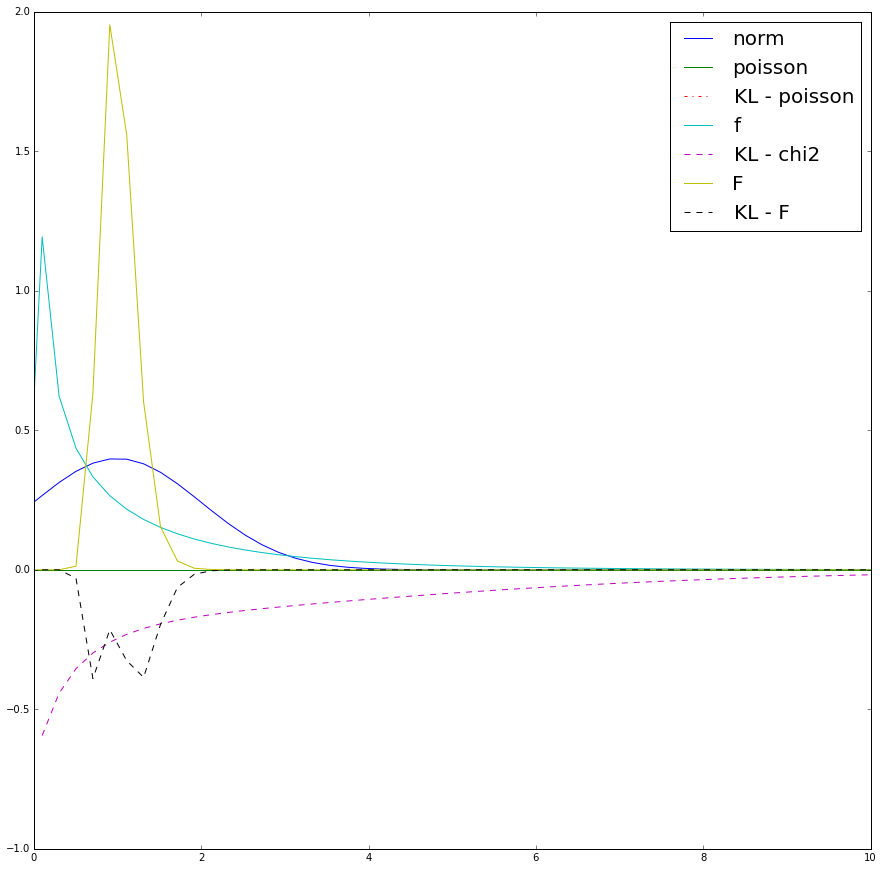

In [66]:
pl.figure(figsize=(15,15))

p = lambda x, mu : scipy.stats.distributions.poisson.pmf(x,mu)
q = lambda x, mu : scipy.stats.distributions.norm.pdf(x-mu)
c = lambda x, mu : scipy.stats.distributions.chi2.pdf(x, df=mu)
f = lambda x, mu : scipy.stats.distributions.f.pdf(x,100,100)

Dkl = lambda x ,mu, p :  p(x, mu)* np.log10(q(x, mu)) + p(x, mu) *np.log10(p(x, mu))

def model(x) : 
    return 1./(s*np.sqrt(2*np.pi))*exp(-((x-m)/2./2./s)**2)

x=np.linspace(-10,10,100)
pl.plot(x, q(x,1), label='norm')
pl.plot(x, p(x,1), label='poisson')
pl.plot(x, Dkl(x, 1, p), '-.', label = 'KL - poisson')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, p))


pl.plot(x, c(x,1), label='f')
pl.plot(x,Dkl(x, 1, c), '--', label = 'KL - chi2')



#print np.nansum(Dkl(np.linspace(0,30,1000), 1, c))


pl.plot(x, f(x,1), label='F')
pl.plot(x,Dkl(x, 1, f), '--', label = 'KL - F')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, f))
bins = np.arange(0, 99, 10)

pl.xlim(0,10)
pl.legend( fontsize = 20)

The distributions appear to have a similar mean though variances differ. 